# Project Objective:

Building a machine learning model to help governments plan investements in renewable energy to reach the 100% access to electricity goal by 2030. 

# Data

Electricity is a key pillar to human well-being and economic development. However, even today a certain percentage of the world's population does not have access to electricity.

On the other hand, a recent report by the United Nations claims that at the current rate of green house gas emissions, the temperature will rise by 2.7F leading to worsening fodd shortages. wild fires and mass death of coral reefs as soon as 2040.

To keep up with the growing needs for accessible electricity as well as to present the long term effects of global warming, energy systems must rethink their approach to renewable energy generation

The data was obtained from:
1. energy data : https://www.bp.com/en/global/corporate/energy-economics/statistical-review-of-world-energy.html

2. population data, Access to electricity : https://data.worldbank.org/

3. Investment data: http://resourceirena.irena.org/gateway/dashboard/

Please visit Project_data_clean1.ipynb, Project_data_clean2.ipynb for original data.
Also visit population_forecasting.ipynb, investment_forecasting.ipynb, NRE_forecast.ipynb for forcasting models used in this project

Project_data_clean1.ipynb: 
cleaning the data on energy data and access to electricity. It contains the visualizations for this project. It cleans up the data an plots the ammount of energy consumed over the years and the consumption based on the source of generation.


Project_data_clean2.ipynb:
Cleaning the data from population and investements.


population_forecasting.ipynb:
Forecasts the population to the year 2030


investment_forecasting.ipynb:
Forecasts the investments in Renewable Energy to the year 2030


NRE_forecast.ipynb:
Forecasts the non-renewable energy to the year 2030



The data loaded in this files are cleaned up and saved .xlsx files

In [1]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library
import matplotlib.pyplot as plt

In [2]:
India_energy = pd.read_excel("cent_elec_1993-2017.xlsx")
India_energy = India_energy.set_index('Year')

In [3]:
pop_growth = pd.read_excel("population_growth_forecast_1960-2030_India.xlsx")
pop_growth = pop_growth.set_index('Year')

In [4]:
Investment_forcast_India = pd.read_excel("Investment_per_tech_India.xlsx")

In [5]:
India_RE_gen = pd.read_excel('India_RE_profile_1990-2018.xlsx')

In [6]:
India_invest = pd.read_excel('investment_growth_forecast_2004-2030_India.xlsx')

In [7]:
NRE_India_pred = pd.read_excel('NRE_India_Forecast.xlsx')

# Predict the future needs of electricity

Built a machine learning model which takes into account time and population and predicts the energy needs of the future for India

To build this model, data from population_forecast has been used

Input: year, Population -> Output: 100% access to electricity of the future

In [8]:
forcast_X1 = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = list(range(24,38)))

In [9]:
forcast_X1['Population'] = list(pop_growth['pop_pred'][57:])

In [10]:
# input is year,populatiion, output is cent_access
X1 = pd.DataFrame(list(range(1993,2018)), columns = ['Year'])
X1['Population'] = list(India_energy['Population'])
Y1 = India_energy['cent_access']

In [11]:
X1_train = X1[:20]
X1_test = X1[20:]
Y1_train = Y1[:20]
Y1_test = Y1[20:]

In [12]:
from sklearn.linear_model import Ridge
from sklearn import metrics

elec_pred = Ridge(alpha = 2.51)
elec_pred.fit(X1_train,Y1_train)

C:\Users\pooji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.219448e-17
  overwrite_a=True).T


Ridge(alpha=2.51, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
y1_pred = elec_pred.predict(X1_test)
print("R^2:", metrics.r2_score(y1_pred, Y1_test))

R^2: 0.6100791008028612


In [14]:
y2_pred = elec_pred.predict(forcast_X1)

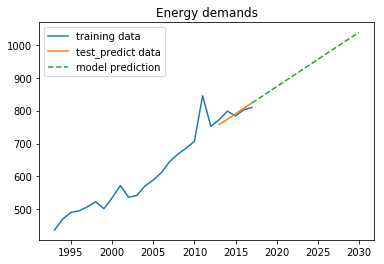

In [15]:
plt.plot(X1['Year'], Y1, label='training data')
plt.plot(X1_test['Year'], y1_pred, label='test_predict data')
plt.plot(forcast_X1['Year'], y2_pred, '--', label='model prediction')
plt.legend()
plt.title('Energy demands')
plt.show()

# Predict the growth rate of Renewable energy

Built a machine learning model which takes into account time, population and investment in renewable energy and predicts the renewable energy generation in the future

To build this model, data from population_forecast and investment_forecast has been used

input: total_investment, population, year -> output: growth in RE generation

In [16]:

Xt = pd.DataFrame(list(range(2004,2018)), columns = ['Year'])
Xt['T_invest'] = list(India_invest['T_invest_pred'][:14])
Xt['Population'] = list(India_energy['Population'])[11:]
Yt = list(India_RE_gen['RE Generation total TWh'])[14:-1]

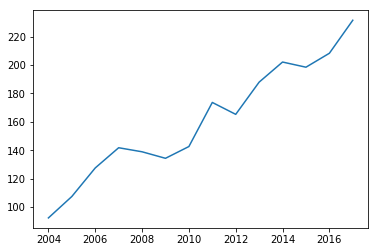

In [17]:
plt.plot(Xt['Year'], Yt)
plt.show()

In [18]:
Xt_train = Xt[:10]
Xt_test = Xt[10:]
Yt_train = Yt[:10]
Yt_test = Yt[10:]

In [19]:
forcast_Xt = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = list(range(24,38)))
forcast_Xt['T_invest'] = list(India_invest['T_invest_pred'])[13:]
forcast_Xt['Population'] = list(pop_growth['pop_pred'][57:])

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# lasso 0.001 --> 0.59
RE_growth = LinearRegression()
RE_growth.fit(Xt_train,Yt_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
yt1_pred = RE_growth.predict(Xt_test)
print("R^2:", metrics.r2_score(yt1_pred, Yt_test))

R^2: 0.18604012398834802


In [22]:
yt2_pred = RE_growth.predict(forcast_Xt)

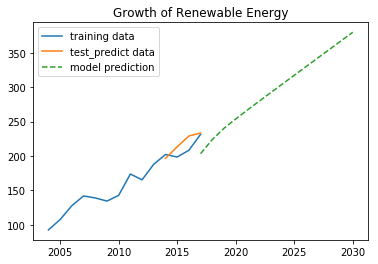

In [23]:
plt.plot(Xt['Year'], Yt, label='training data')
plt.plot(Xt_test['Year'], yt1_pred, label='test_predict data')
plt.plot(forcast_Xt['Year'], yt2_pred, '--', label='model prediction')
plt.legend()
plt.title('Growth of Renewable Energy')
plt.show()

### Growth rate of solar energy:

Machine learning model that predicts the growth of solar energy 

In [24]:
# input is total_investment,investment_per_tech,population,year -> output is growth in RE generation
X2 = pd.DataFrame(list(range(2004,2018)), columns = ['Year'])
X2['T_invest'] = list(India_invest['T_invest_pred'])[:14]
X2['Solar_invest'] = list(India_invest['solar_invest_pred'])[:14]
X2['Population'] = list(India_energy['Population'])[11:]
Y2 = np.log(list(India_RE_gen['Solar Generation TWh'])[14:-1])

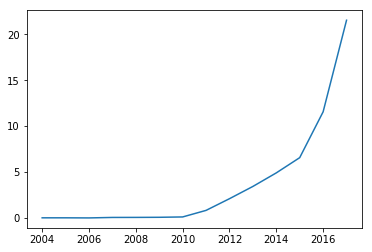

In [25]:
k = list(India_RE_gen['Solar Generation TWh'])[14:-1]
plt.plot(X2['Year'], k)

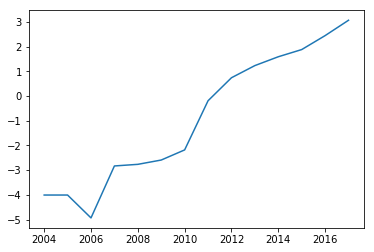

In [26]:
plt.plot(X2['Year'], Y2)

In [27]:
X2_train = X2[:10]
X2_test = X2[10:]
Y2_train = Y2[:10]
Y2_test = Y2[10:]

In [28]:
forcast_X2 = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = list(range(24,38)))
forcast_X2['T_invest'] = list(India_invest['T_invest_pred'])[13:]
forcast_X2['Solar_invest'] = list(India_invest['solar_invest_pred'])[13:]
forcast_X2['Population'] = list(pop_growth['pop_pred'][57:])

In [29]:
from sklearn.linear_model import Lasso
from sklearn import metrics

elec_pred1 = Lasso(alpha = 1000)
elec_pred1.fit(X2_train,Y2_train)

Lasso(alpha=1000, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
y3_pred = elec_pred1.predict(X2_test)
print("R^2:", metrics.r2_score(y3_pred, Y2_test))

R^2: 0.29068834079838735


In [31]:
y4_pred = elec_pred1.predict(forcast_X2)

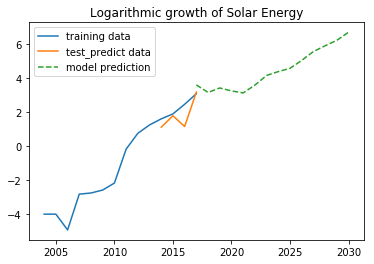

In [32]:
plt.plot(X2['Year'], Y2, label='training data')
plt.plot(X2_test['Year'], y3_pred, label='test_predict data')
plt.plot(forcast_X2['Year'], y4_pred, '--', label='model prediction')
plt.legend()
plt.title('Logarithmic growth of Solar Energy')
plt.show()

# Reaching the goal:

Plot the lines of 100% access to electricity and the sum of renewable energy and non-renewable energy. The intersection of the lines says that the country is reaching the goal of 100% access through the investments. If the lines do not meet, Countries must rethink their investments

In [33]:
cent_access = list(India_energy['cent_access'][11:])
for i in range(1,len(y2_pred)):
    cent_access.append(y2_pred[i])

In [34]:
x1 = cent_access

In [35]:
nre_energy = list(NRE_India_pred['NRE_pred'][11:])

In [36]:
x2 = nre_energy

In [37]:
RE_pred_f = list(India_RE_gen['RE Generation total TWh'])[14:]
for i in range(2,len(yt2_pred)):
    RE_pred_f.append(yt2_pred[i])

In [38]:
x3 = RE_pred_f

In [39]:
total = []

for i in range(len(RE_pred_f)):
    x3_mtoe = 85984.5*x3[i]/1000000
    total.append(x3_mtoe + x2[i])

In [40]:
y = list(range(2004,2031))

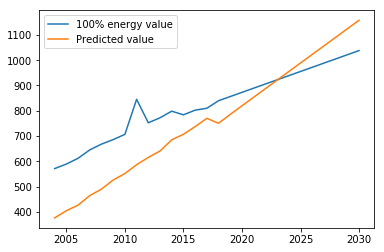

In [41]:
plt.plot(y, x1, label='100% energy value')
plt.plot(y,total , label='Predicted value')
plt.legend()
plt.show()

This concludes that India will reach 100% access to electricity by 2025 if the investment in renewable energy will follow the trend used in this model